In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

In [2]:
%matplotlib inline

In [4]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [6]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


In [9]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [11]:
df.isnull().count()

loan_amnt               396030
term                    396030
int_rate                396030
installment             396030
grade                   396030
sub_grade               396030
emp_title               396030
emp_length              396030
home_ownership          396030
annual_inc              396030
verification_status     396030
issue_d                 396030
loan_status             396030
purpose                 396030
title                   396030
dti                     396030
earliest_cr_line        396030
open_acc                396030
pub_rec                 396030
revol_bal               396030
revol_util              396030
total_acc               396030
initial_list_status     396030
application_type        396030
mort_acc                396030
pub_rec_bankruptcies    396030
address                 396030
dtype: int64

<AxesSubplot:xlabel='loan_status', ylabel='count'>

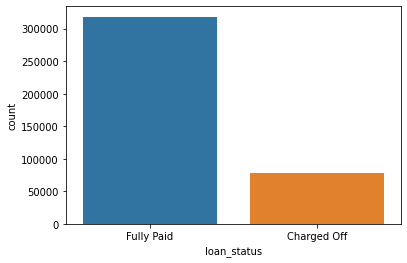

In [14]:
sns.countplot(x='loan_status',data=df)

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

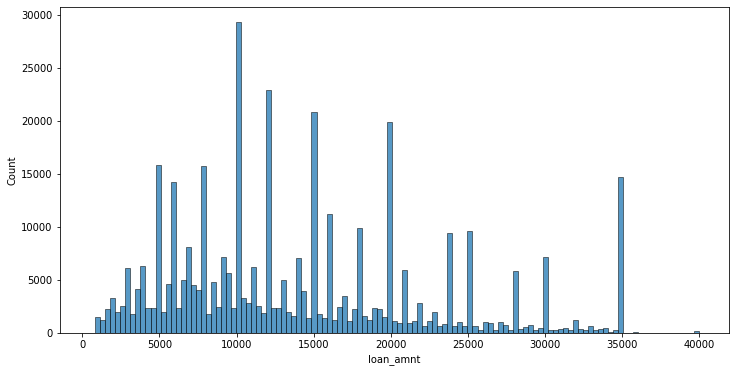

In [20]:
plt.figure(figsize=(12,6))

sns.histplot(df['loan_amnt'])

In [21]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<AxesSubplot:>

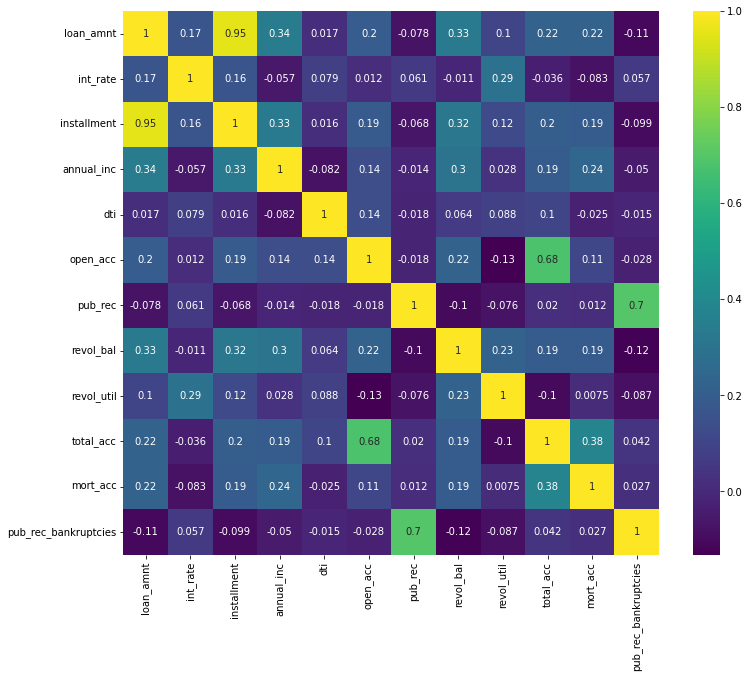

In [23]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(),annot=True,cmap='viridis')

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

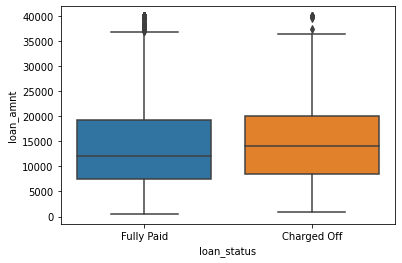

In [24]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [26]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<AxesSubplot:>

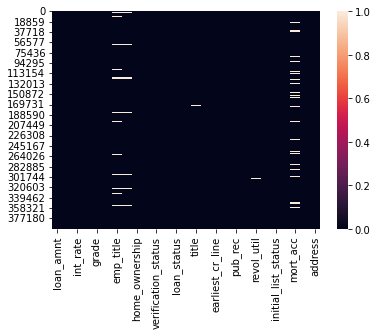

In [13]:
sns.heatmap(df.isnull())